# Full scans, varying  $L_\mathrm{min}$

Here we will analyze the results of the full scans that were performed on the cluster. The scripts to run the scans in parallel on the cluster are located in the `run/` folder, also containing examples of `SLURM` batch files used to launch these scan. The file names are below. These are used to obtain the Monte Carlo chains, which are included in the repository.

Three scans are performed, floating:

- $N_D$, $z_0$ and $\beta$ (`run_nd_z0_beta.py`)
- $N_D$, $N_B$, $z_0$ and $\beta$ (`run_nd_nb_z0_beta_prior.py`)
- $N_D$, $N_B$, $z_0$, $\beta$ and $\alpha$ (`run_nd_nb_z0_beta_alpha_prior.py`)

and the likelihoods between runs including the bulge population are compared with those without it to test preference for the bulge population.

For these runs, we show:

- Best-fit log-evidence
- Best-fit parameters
- For the bulge runs, TS preference with respect to disk-only

We check $L_\mathrm{min} = 10^{32}$ erg$\,$s$^{-1}$ and $L_\mathrm{min} = 10^{33}$ erg$\,$s$^{-1}$ here.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

# $L_\mathrm{min} = 10^{32}$ erg$\,$s$^{-1}$

## Float $N_D$, $z_0$ and $\beta$

In [2]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0]

floated_params = ['N_disk', 'z0', 'beta']
floated_param_priors = [[0,3000000],[0.01,2.0],[1.1,3.0]]

rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [3]:
chains_dir = '../run/chains/rs_nd_Lmin1e32/'

In [4]:
lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_global = np.array(rs_nd.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_Lmin1e32/.txt
  analysing data from ../run/chains/rs_nd_Lmin1e32/.txt


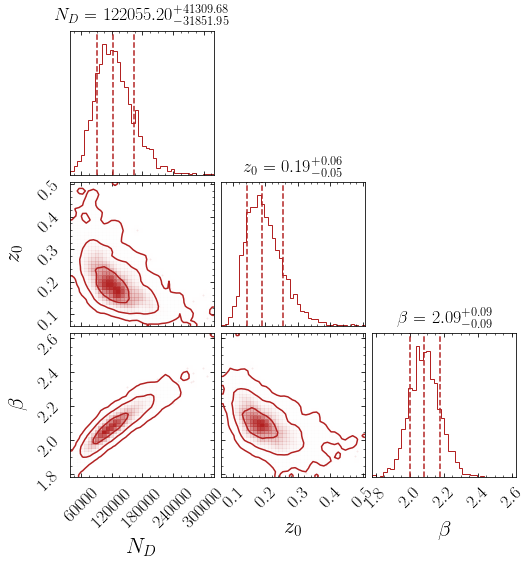

In [5]:
rs_nd.plot_corner(labels = ['$N_D$','$z_0$', '$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_Lmin1e32.pdf")

In [6]:
print "Best-fit log-evidence:",2*lge_nd

Best-fit log-evidence: -582.608567083


In [7]:
print "Best-fit parameters"
zip(floated_params, rs_nd.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_Lmin1e32/.txt


[('N_disk', 113324.51573681465),
 ('z0', 0.19443589074547676),
 ('beta', 2.061447268163898)]

## Float $N_D$, $N_B$, $z_0$ and $\beta$

In [8]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk','z0', 'beta']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0],[1.1,3.0]]

In [9]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [10]:
chains_dir = '../run/chains/rs_nd_nb_Lmin1e32/'

In [11]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_nb_global = np.array(rs_nd_nb.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_nb_Lmin1e32/.txt
  analysing data from ../run/chains/rs_nd_nb_Lmin1e32/.txt


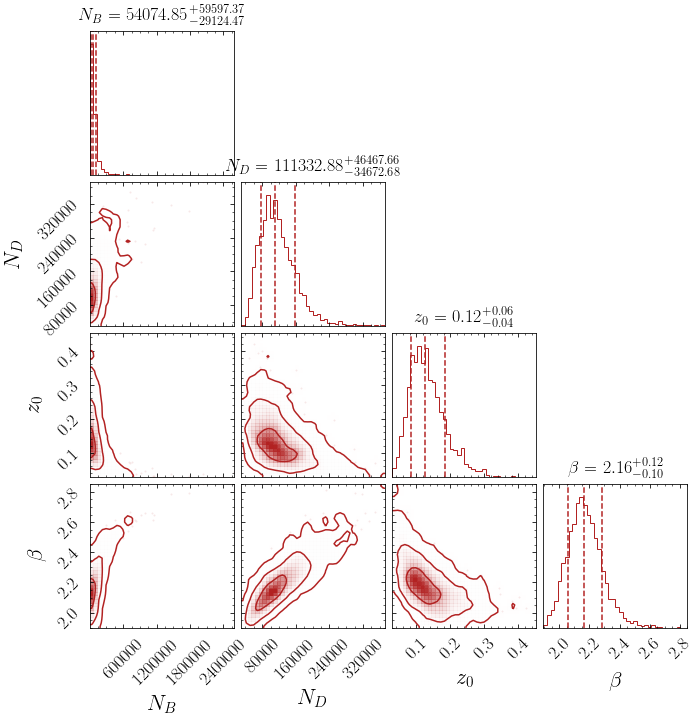

In [12]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$','$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_nb_Lmin1e32.pdf")

In [13]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -574.496741573


In [14]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_Lmin1e32/.txt


[('N_bulge', 32438.092959685157),
 ('N_disk', 87534.858122517224),
 ('z0', 0.13950833635690085),
 ('beta', 2.0708223699261987)]

In [15]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = 8.11182551078
2.84812666691 sigma


In [16]:
lge_nd_nb_global

array([ -3.00964715e+02,   1.49844344e-01])

In [17]:
lge_nd_global

array([ -3.00769182e+02,   1.26233975e-01])

In [18]:
BF = np.exp(lge_nd_nb_global - lge_nd_global)
print "Bayes Factor =", str(BF[0])[:4], "±",  str(BF[1])[:4]

Bayes Factor = 0.82 ± 1.02


# $L_\mathrm{min} = 10^{33}$ erg$\,$s$^{-1}$

## Float $N_D$, $z_0$ and $\beta$

In [19]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,0]

floated_params = ['N_disk', 'z0', 'beta']
floated_param_priors = [[0,3000000],[0.01,2.0],[1.1,3.0]]

rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [20]:
chains_dir = '../run/chains/rs_nd_Lmin1e33/'

In [21]:
lge_nd = rs_nd.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_global = np.array(rs_nd.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_Lmin1e33/.txt
  analysing data from ../run/chains/rs_nd_Lmin1e33/.txt


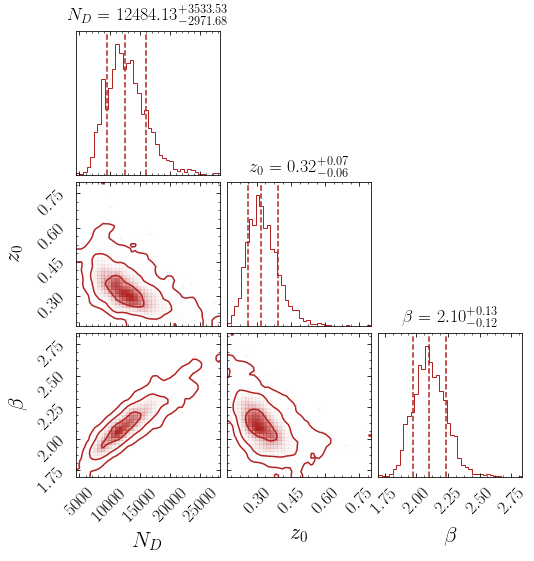

In [22]:
rs_nd.plot_corner(labels = ['$N_D$','$z_0$', '$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_Lmin1e33.pdf")

In [23]:
print "Best-fit log-evidence:",2*lge_nd

Best-fit log-evidence: -591.980371881


In [24]:
print "Best-fit parameters"
zip(floated_params, rs_nd.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_Lmin1e33/.txt


[('N_disk', 11909.108555616112),
 ('z0', 0.31612662206518211),
 ('beta', 2.0742843730558573)]

## Float $N_D$, $N_B$, $z_0$ and $\beta$

In [25]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk','z0', 'beta']
floated_param_priors = [[0,3000000],[0,3000000],[0.01,2.0],[1.1,3.0]]

In [26]:
rs_nd_nb = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 10, share_betas=True, use_prior=True)

In [27]:
chains_dir = '../run/chains/rs_nd_nb_Lmin1e33/'

In [28]:
lge_nd_nb = rs_nd_nb.get_bestfit_lge(chains_dir=chains_dir)
lge_nd_nb_global = np.array(rs_nd_nb.get_global_lge(chains_dir=chains_dir))

  analysing data from ../run/chains/rs_nd_nb_Lmin1e33/.txt
  analysing data from ../run/chains/rs_nd_nb_Lmin1e33/.txt


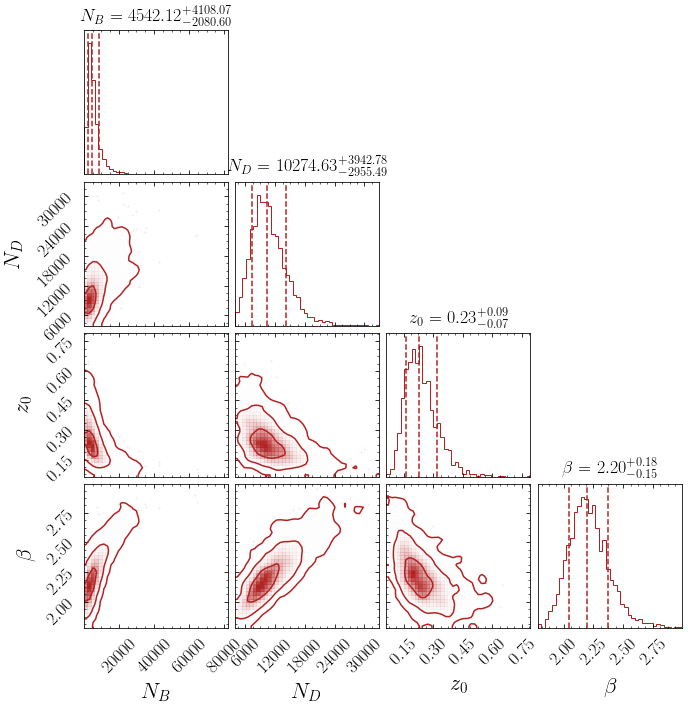

In [29]:
rs_nd_nb.plot_corner(labels = ['$N_B$','$N_D$','$z_0$','$\\beta$'], chains_dir=chains_dir)
plt.savefig("plots/rs_nd_nb_Lmin1e33")

In [30]:
print "Best-fit log-evidence:",2*lge_nd_nb

Best-fit log-evidence: -581.912047322


In [31]:
print "Best-fit parameters"
zip(floated_params, rs_nd_nb.get_bestfit_params(chains_dir))

Best-fit parameters
  analysing data from ../run/chains/rs_nd_nb_Lmin1e33/.txt


[('N_bulge', 3101.0760861740241),
 ('N_disk', 8735.8920896598247),
 ('z0', 0.24501992912791065),
 ('beta', 2.0951751308455204)]

In [32]:
TS = 2*(lge_nd_nb - lge_nd)
print "TS =", TS
print np.sqrt(TS), "sigma"

TS = 10.0683245592
3.17306233145 sigma


In [33]:
BF = np.exp(lge_nd_nb_global - lge_nd_global)
print "Bayes Factor =", str(BF[0])[:4], "±",  str(BF[1])[:4]

Bayes Factor = 0.17 ± 1.03
